In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import mne
#import h5py
from scipy.io import loadmat, savemat

# Temporary path BS to add FOOOF module to path
import os
import sys
#sys.path.append('/home/knight/hoycw/Apps/fooof/')

# Import the FOOOF object
from fooof import FOOOFGroup

In [25]:
if os.path.isdir('/Volumes/hoycw_clust/'):
    root_dir = '/Volumes/hoycw_clust/'
elif os.path.isdir('/home/knight/hoycw/'):
    root_dir = '/home/knight/hoycw/'

In [26]:
SBJ = 'IR35'
an_id = 'FOOOF_main_ft_f0to200_all'
atlas_id = 'Dx'
roi_id = 'gROI'

SBJ_data_dir = root_dir+'PRJ_Stroop/data/' + SBJ + '/02_preproc/'
psd_fname = SBJ_data_dir + SBJ + '_' + an_id + '_PSDs.mat'

In [27]:
all_data = loadmat(psd_fname)
freqs = np.squeeze(all_data['freqs']).astype('float')
psds  = np.squeeze(all_data['psds']).astype('float')
label_array = all_data['labels']
labels = [str(''.join(letter)) for letter_array in label_array for letter in letter_array]

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                             Number of power spectra in the Group: 70                             
                                                                                                  
                        The model was run on the frequency range 1 - 50 Hz                        
                                 Frequency Resolution is 0.24 Hz                                  
                                                                                                  
                              Power spectra were fit without a knee.                              
                                                                                                  
          

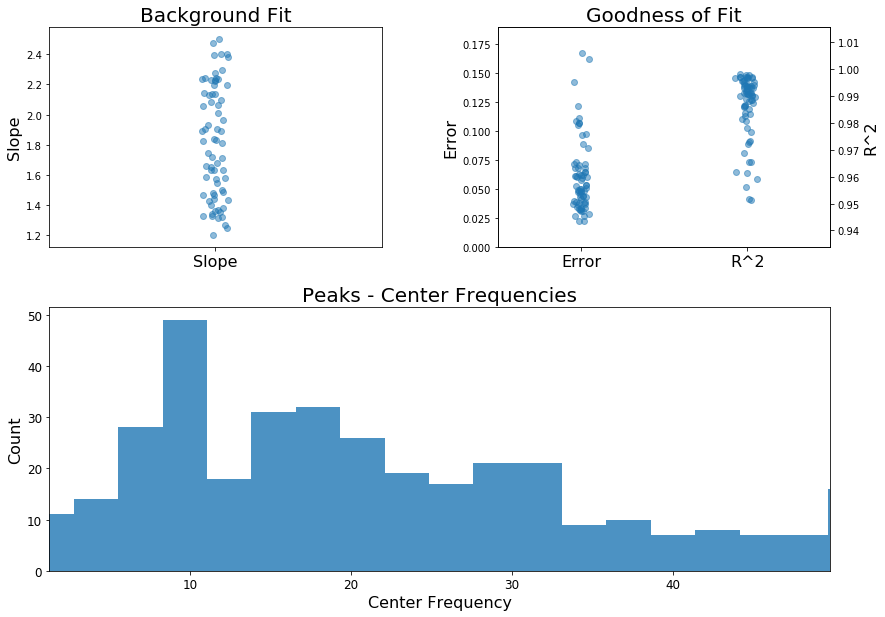

In [31]:
fg = FOOOFGroup()
fg.report(freqs,psds, [1,50])

## Plot Individual Electrodes

## Save Outputs

In [47]:
# Since I don't have json support (MATLAB > r2016B):
#  Save out full FOOOFresults for each PSD fit separately to mat files
SBJ_fooof_dir = SBJ_data_dir + an_id + '_results/'
if not os.path.exists(SBJ_fooof_dir):
    os.makedirs(SBJ_fooof_dir)
fooof_ch_fname = SBJ_fooof_dir + SBJ + '_' + an_id + '_fooof_{0}.mat'
for ind, f_res in enumerate(fg):
    savemat(fooof_ch_fname.format(labels[ind]), f_res._asdict())

# OLD HDF5 Loading Shit

In [39]:
# data = {}
# f = h5py.File(preproc_fname)
# for k, v in f['data'].items():
#     data[k] = np.array(v)

# with h5py.File(preproc_filename) as f:
#     trial_pointer = f['data']['trial'][0]
#     trial = f[trial_pointer]
    
# trial.shape

# tmp = []
# with h5py.File(preproc_filename) as f:
#     for column in f['data']:
#         row_data = []
#         for row_number in range(len(column)):            
#             row_data.append(''.join(map(unichr, f[column[row_number]][:])))   
#         data.append(row_data)

# print(data)
# #print np.transpose(data)